In [11]:
documents = []

ego_id = '40379006'

file = open('/home/amaury/Lucas/n2/textos_tradados/egos/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

file = open('/home/amaury/Lucas/n2/textos_tradados/alters/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [20]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf)

In [21]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [22]:
no_top_words = 5
display_topics(nmf, tf_feature_names, no_top_words)

Topic #0: god know trust lord pray
Topic #1: love live heart hate friends
Topic #2: leaders goal lead best leadership
Topic #3: day great small success efforts
Topic #4: people know read church need
Topic #5: gt yes sure perfect classy
Topic #6: life jesus don way faith
Topic #7: new live video checkout bracelet
Topic #8: like good time look make
Topic #9: given man humble self proverbs



In [23]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
nmf_output = nmf.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 6), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0,0,0,0,0,0,0,0
Doc1,0,0.000735,0.006633,0,0.005898,0.002615,0,0.014433,0.011482,0,7
Doc2,0.002833,0.000347,0.008945,0,0.005406,0.083728,0,0.000348,0,0,5
Doc3,0.1627,0,0.01201,0,0,0,0.013664,0,0.181231,0,8
Doc4,0.000109,0,0.002228,0,0,0,0.000534,0.001347,0.003692,0,8
Doc5,0.000537,0,0,0.005633,0,0,0.006064,0.012786,0.000681,0,7
Doc6,0.005077,0.01157,0,0.011398,0.006769,0.010729,0.014364,0.010176,0.006021,0,6
Doc7,0,0.001018,0.000526,0.012697,0,0,0,0,0,0,3
Doc8,0.325406,0,0.029735,0.018902,0,0,0.005947,0,0,0,0
Doc9,0.168261,0,0.007297,0,0,0,0.012417,0,0,0,0


In [24]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,536
1,8,375
2,7,354
3,6,282
4,3,255
5,4,233
6,2,201
7,5,193
8,1,181
9,9,107


In [25]:
df_topic_distribution = df_document_topic['dominant_topic']
i = 0
for doc in df_topic_distribution:
    if doc == 0:
        print(documents[i])
    i = i + 1

Are cheering performance Tightrope ft 

Light fire inside You seed Almighty God Don allow something small keep God best 

Walk gifts calling Don compare others God needs YOU 

The righteousness comes God faith Phil 3 9 

HAHAHAHHA 

Be content God said Never I leave never I forsake Hebrews 13 5 

Basically 

No passport required 

God good 

I gon praise praise til I gone 

Don show God big problems Show problems big God 

God great 

If accept God asking trouble forging ahead without promise protection 

StephenCurry30 first unanimous MVP 

Just see going anymore mean God changed destination 

You certainly carry God purpose however act makes difference whether serve like Jud 

God plan bigger mistakes 

If going pray rain complain mud fact revival 

Such Amazing Baptismal Service Tonight God Move 

None 

travel much 

When told LESS IS MORE 

Number one rule loft 

God always 

I thank God I live country dreams come true failure sometimes 1st step success 

Belong What even mean 

F

Text(0.5, 1.0, 'Segregation of Topic Clusters')

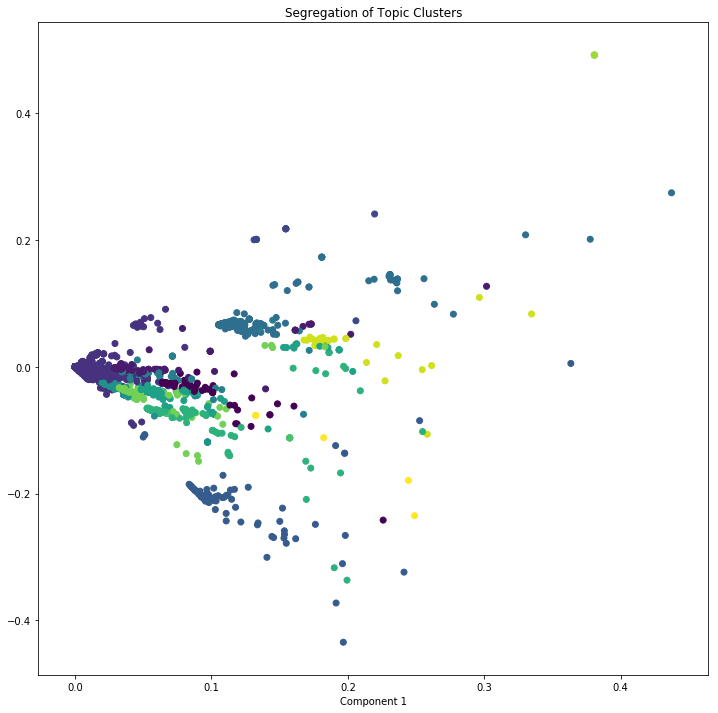

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
nmf_output_svd = svd_model.fit_transform(nmf_output)

# X and Y axes of the plot using SVD decomposition
x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )